# <span style='color:White'> Lab 5 - General Linear Models: Logistic regression </span>

In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

### Read data from csv file

In [2]:
data = pd.read_csv (r'logistic_reg_data.csv')
data

,Unnamed: 0,x1,x2,x3,x4,x5,y
0,0,-0.318816,0.101644,-3.240568e-02,1.033146e-02,-3.293836e-03,1
1,1,0.823793,0.678635,5.590543e-01,4.605449e-01,3.793936e-01,1
2,2,-0.948920,0.900449,-8.544537e-01,8.108081e-01,-7.693919e-01,0
3,3,-0.601142,0.361371,-2.172353e-01,1.305892e-01,-7.850259e-02,1
4,4,-0.008257,0.000068,-5.629723e-07,4.648534e-09,-3.838354e-11,1
...,...,...,...,...,...,...,...
495,495,-0.930452,0.865742,-8.055313e-01,7.495084e-01,-6.973819e-01,0
496,496,-0.675202,0.455898,-3.078229e-01,2.078426e-01,-1.403357e-01,0
497,497,0.991789,0.983646,9.755700e-01,9.675600e-01,9.596158e-01,1
498,498,0.714850,0.511011,3.652959e-01,2.611318e-01,1.866701e-01,1


In [3]:
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,249.500000,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,144.481833,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,0.000000,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,124.750000,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,249.500000,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,374.250000,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,499.000000,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


### Prior selection

In [4]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
R=1000
data_ppc1= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc1, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


# Task 1 
1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

In [16]:
R=1000
data_ppc2= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=5)
sim_ppc2=model_ppc1.sample(data=data_ppc2, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [17]:
R=1000
data_ppc3= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc3=model_ppc1.sample(data=data_ppc3, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [20]:
df1 = sim_ppc1.draws_pd()
df2 = sim_ppc2.draws_pd()
df3 = sim_ppc3.draws_pd()

beta1 = sim_ppc1.stan_variable('beta')
beta2 = sim_ppc2.stan_variable('beta')
beta3 = sim_ppc3.stan_variable('beta')

Text(0.5, 1.0, 'Sigma = 10')

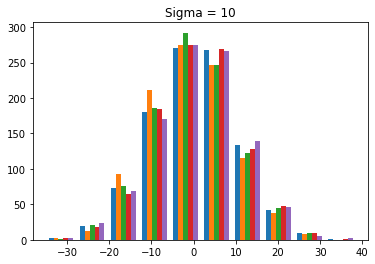

In [32]:
plt.hist(beta1)
plt.title('Sigma = 10')

Text(0.5, 1.0, 'Sigma = 5')

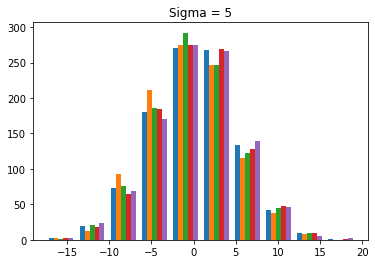

In [33]:
plt.hist(beta2)
plt.title('Sigma = 5')

Text(0.5, 1.0, 'Sigma = 2')

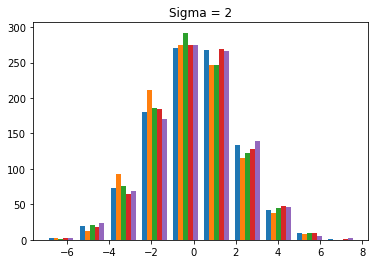

In [29]:
plt.hist(beta3)
plt.title('Sigma = 2')